<a href="https://colab.research.google.com/github/Adricarpin/TensorFlow-notebooks/blob/master/Computer%20vision/image_classification_101_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [ ]:
! wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2021-11-07 08:27:07--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2021-11-07 08:27:08--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  10.3MB/s    in 7m 30s  

2021-11-07 08:34:39 (10.6 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



In [ ]:
! tar xzf food-101.tar.gz

# Become one with data

In [ ]:
train_dir = 'food-101/images/'

Show number of folders and number of images per folder:

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk(train_dir): 
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 101 directories and 0 images in 'food-101/images/'.
There are 0 directories and 1000 images in 'food-101/images/pad_thai'.
There are 0 directories and 1000 images in 'food-101/images/cheese_plate'.
There are 0 directories and 1000 images in 'food-101/images/guacamole'.
There are 0 directories and 1000 images in 'food-101/images/grilled_cheese_sandwich'.
There are 0 directories and 1000 images in 'food-101/images/fish_and_chips'.
There are 0 directories and 1000 images in 'food-101/images/sushi'.
There are 0 directories and 1000 images in 'food-101/images/cheesecake'.
There are 0 directories and 1000 images in 'food-101/images/french_toast'.
There are 0 directories and 1000 images in 'food-101/images/carrot_cake'.
There are 0 directories and 1000 images in 'food-101/images/chicken_wings'.
There are 0 directories and 1000 images in 'food-101/images/macaroni_and_cheese'.
There are 0 directories and 1000 images in 'food-101/images/falafel'.
There are 0 directories and 1000 images

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("food-101/images") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheese_plate' 'cheesecake' 'chicken_curry'
 'chicken_quesadilla' 'chicken_wings' 'chocolate_cake' 'chocolate_mousse'
 'churros' 'clam_chowder' 'club_sandwich' 'crab_cakes' 'creme_brulee'
 'croque_madame' 'cup_cakes' 'deviled_eggs' 'donuts' 'dumplings' 'edamame'
 'eggs_benedict' 'escargots' 'falafel' 'filet_mignon' 'fish_and_chips'
 'foie_gras' 'french_fries' 'french_onion_soup' 'french_toast'
 'fried_calamari' 'fried_rice' 'frozen_yogurt' 'garlic_bread' 'gnocchi'
 'greek_salad' 'grilled_cheese_sandwich' 'grilled_salmon' 'guacamole'
 'gyoza' 'hamburger' 'hot_and_sour_soup' 'hot_dog' 'huevos_rancheros'
 'hummus' 'ice_cream' 'lasagna' 'lobster_bisque' 'lobster_roll_sandwich'
 'macaroni_and_cheese' 'macarons' 'miso_soup' 'mussels' 'nachos'
 'omelette' 'onion_rings' 'oy

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


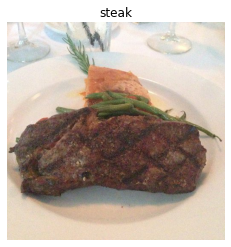

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="food-101/images/",
                        target_class="steak")

# Folder to Dataset

We will split the data into training and validation datasets.

In [ ]:
import tensorflow as tf

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=(224, 224),
                                                                            label_mode="categorical",
                                                                            batch_size=32,
                                                                            validation_split=0.2,
                                                                            subset='training',
                                                                            seed=17,
                                                                            shuffle=True) # default

Found 101000 files belonging to 101 classes.
Using 80800 files for training.


In [ ]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=(224, 224),
                                                                            label_mode="categorical",
                                                                            batch_size=32,
                                                                            validation_split=0.2,
                                                                            subset='validation',
                                                                            seed=17,
                                                                            shuffle=True)

Found 101000 files belonging to 101 classes.
Using 20200 files for validation.


# Working with tf.data.Dataset

In [ ]:
train_len = train_data.cardinality().numpy()
train_len

2525

In [ ]:
train_data.class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
for images, labels in train_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [3.00000000e+00 0.00000000e+00 0.00000000e+00]
   [4.07144165e+00 7.14416504e-02 0.00000000e+00]
   [3.64282227e+00 0.00000000e+00 0.00000000e+00]]

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [3.00000000e+00 0.00000000e+00 0.00000000e+00]
   [4.07144165e+00 7.14416504e-02 0.00000000e+00]
   [3.64282227e+00 0.00000000e+00 0.00000000e+00]]

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [3.00000000e+00 0.00000000e+00 0.00000000e+00]
   [4.07144165e+00 7.14416504e-02 0.00000000e+00]
   [3.64282227e+00 0.00000000e+00 0.00000000e+00]]

  ...

  [[1.23016884e+02 1.00016884e+02 6.86052094e+01]
   [1

In [ ]:
for images, labels in train_data.take(1):
  print(images.shape)
  print(labels.shape)

(32, 224, 224, 3)
(32, 101)


In [ ]:
for images, labels in train_data.take(1):
  print(tf.reduce_max(images))


tf.Tensor(255.0, shape=(), dtype=float32)


# Model 1: feature extraction with EfficientNetB0

In [ ]:
from tensorflow.keras import layers

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=(224, 224, 3))
x = base_model(inputs)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(len(train_data.class_names), activation='softmax')(x)

model_1 = tf.keras.Model(inputs, outputs)

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss="categorical_crossentropy",
                metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                                  patience=2)

In [ ]:
history_1 = model_1.fit(train_data,
                      epochs = 10,
                      validation_data = val_data,
                      verbose = 1,
                      validation_steps = int(0.1*len(val_data)),
                      callbacks=[early_stopping])

Epoch 1/10
2525/2525 [==============================] - 370s 132ms/step - loss: 1.8076 - accuracy: 0.5575 - val_loss: 1.3743 - val_accuracy: 0.6419
Epoch 2/10
2525/2525 [==============================] - 333s 132ms/step - loss: 1.3058 - accuracy: 0.6609 - val_loss: 1.2861 - val_accuracy: 0.6612
Epoch 3/10
2525/2525 [==============================] - 335s 132ms/step - loss: 1.1717 - accuracy: 0.6936 - val_loss: 1.2663 - val_accuracy: 0.6682
Epoch 4/10
2525/2525 [==============================] - 336s 133ms/step - loss: 1.0882 - accuracy: 0.7128 - val_loss: 1.2263 - val_accuracy: 0.6726
Epoch 5/10
2525/2525 [==============================] - 335s 132ms/step - loss: 1.0274 - accuracy: 0.7284 - val_loss: 1.2577 - val_accuracy: 0.6726
Epoch 6/10
2525/2525 [==============================] - 334s 132ms/step - loss: 0.9783 - accuracy: 0.7398 - val_loss: 1.2269 - val_accuracy: 0.6771
Epoch 7/10
2525/2525 [==============================] - 336s 133ms/step - loss: 0.9387 - accuracy: 0.7476 - val_

# Fine tune Model 1

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
# Recompile model with lower learning rate
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), # 10x lower learning rate than default
              metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                                  patience=2)

In [ ]:
fine_tune_epochs = 20

history_2 = model_1.fit(train_data,
                        epochs = fine_tune_epochs,
                        validation_data = val_data,
                        # validation_steps = int(0.1*len(val_data)),
                        initial_epoch=history_1.epoch[-1],
                        callbacks=[early_stopping]
)

Epoch 10/20
2525/2525 [==============================] - 432s 168ms/step - loss: 0.8907 - accuracy: 0.7547 - val_loss: 1.2273 - val_accuracy: 0.6946
Epoch 11/20
2525/2525 [==============================] - 418s 165ms/step - loss: 0.7443 - accuracy: 0.7955 - val_loss: 1.2002 - val_accuracy: 0.7011
Epoch 12/20
2525/2525 [==============================] - 425s 168ms/step - loss: 0.6625 - accuracy: 0.8193 - val_loss: 1.1887 - val_accuracy: 0.7051
Epoch 13/20
2525/2525 [==============================] - 426s 168ms/step - loss: 0.5897 - accuracy: 0.8379 - val_loss: 1.1803 - val_accuracy: 0.7103
Epoch 14/20
2525/2525 [==============================] - 426s 169ms/step - loss: 0.5377 - accuracy: 0.8537 - val_loss: 1.1758 - val_accuracy: 0.7127
Epoch 15/20
2525/2525 [==============================] - 426s 169ms/step - loss: 0.4864 - accuracy: 0.8688 - val_loss: 1.1793 - val_accuracy: 0.7134
Epoch 16/20
2525/2525 [==============================] - 426s 169ms/step - loss: 0.4435 - accuracy: 0.8806

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two TensorFlow model History objects.
    
    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here) 
    """

    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') 
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()
  

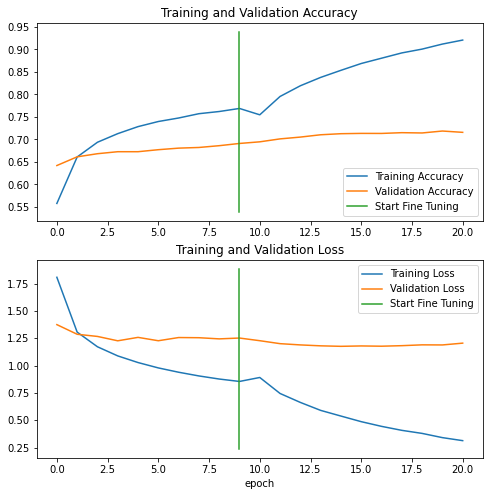

In [ ]:
compare_historys(original_history=history_1,
                 new_history=history_2,
                 initial_epochs=10)